In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# MNIST

In [1]:
from fastai.vision import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/kth/.fastai/data/mnist_sample')

In [3]:
data = ImageDataBunch.from_folder(path)

In [4]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [5]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.166626,0.102593,0.964671,00:23


#### Getting the data

In [7]:
data = ImageDataBunch.from_folder(path)

In [8]:
ds = data.train_ds

##### Images

In [15]:
img, label = ds[0]
img

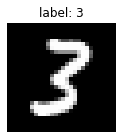

In [22]:
img.show(figsize=(2,2), title='label: ' + str(label))

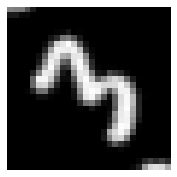

In [24]:
img.rotate(35).show()

## MNIST: Binary Data

In [25]:
PATH = '/home/kth/.fastai/data/mnist_sample'

In [26]:
!ls {PATH}

labels.csv  train  valid


In [27]:
pd.read_csv(PATH + '/' + 'labels.csv')

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0
...,...,...
14429,valid/7/1321.png,1
14430,valid/7/8282.png,1
14431,valid/7/1949.png,1
14432,valid/7/3166.png,1


## Spot the Mask: Data 

In [32]:
!ls {'data'}

images	images.zip  sample_sub_v2.csv  train_labels.csv


In [35]:
path = './data'

In [36]:
data = ImageDataBunch.from_csv(path=path,
                               folder='images',
                               csv_labels='train_labels.csv')

You can deactivate this warning by passing `no_check=True`.


/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/fastai/basic_data.py:272: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 421, 750]), torch.Size([3, 600, 800]), torch.Size([3, 165, 306]), torch.Size([3, 299, 168]), torch.Size([3, 546, 440]), torch.Size([3, 267, 400]), torch.Size([3, 1024, 1024]), torch.Size([3, 183, 275]), torch.Size([3, 225, 225]), torch.Size([3, 628, 1200]), torch.Size([3, 1478, 1108]), torch.Size([3, 227, 222]), torch.Size([3, 227, 405]), torch.Size([3, 450, 800]), torch.Size([3, 322, 305]), torch.Size([3, 583, 875]), torch.Size([3, 194, 259]), torch.Size([3, 176, 127]), torch.Size([3, 720, 720]), torch.Size([3, 430, 604]), torch.Size([3, 2124, 2831]), torch.Size([3, 400, 600]), torch.Size([3, 240, 360]), torch.Size([3, 682, 1024]), torch.Size([3, 768, 488]), torch.Size([3, 183, 275]), torch.Size([3, 1125, 1688]), torch.Size([3, 360, 640]), torch.Size([3, 224, 224]),

In [37]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [38]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/fastai/torch_core.py", line 127, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 159 and 600 in dimension 2 at /opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/TH/generic/THTensor.cpp:612
